In [3]:
import pandas as pd
accident = pd.read_csv('accident.csv')

In [6]:
print(accident.shape)
accident.head()

(10585, 8)


,발생일시,발생요일,도로명,사고내용,사망자수,중상자수,경상자수,부상신고자수
0,2017년 4월 29일 23시,토요일,강남대로,중상사고,0,1,0,0
1,2017년 7월 5일 19시,수요일,강남대로,경상사고,0,0,1,0
2,2017년 6월 24일 23시,토요일,강남대로,경상사고,0,0,1,0
3,2017년 12월 28일 14시,목요일,강남대로,경상사고,0,0,2,0
4,2017년 5월 21일 01시,일요일,강남대로,경상사고,0,0,1,0


In [25]:
accident.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10585 entries, 0 to 10584
Data columns (total 8 columns):
발생일시      10585 non-null object
발생요일      10585 non-null object
도로명       10585 non-null object
사고내용      10585 non-null object
사망자수      10585 non-null int64
중상자수      10585 non-null int64
경상자수      10585 non-null int64
부상신고자수    10585 non-null int64
dtypes: int64(4), object(4)
memory usage: 661.6+ KB


In [26]:
accident.발생요일.value_counts()

토요일    1635
금요일    1581
수요일    1532
목요일    1509
월요일    1473
화요일    1461
일요일    1394
Name: 발생요일, dtype: int64

In [27]:
accident.사고내용.value_counts()

경상사고      6760
중상사고      3038
부상신고사고     692
사망사고        95
Name: 사고내용, dtype: int64

In [31]:
df = accident.groupby(by='도로명').sum()
df['피해자수'] = df.sum(axis=1)
df['사건수'] = accident.도로명.value_counts()
df.sort_values('피해자수',ascending=False).head(20)

,사망자수,중상자수,경상자수,부상신고자수,피해자수,사건수
도로명,,,,,,
남부순환로,1,110,354,42,507,329
언주로,1,55,251,30,337,207
천호대로,4,50,226,14,294,180
도봉로,0,52,221,14,287,185
양재대로,3,59,191,18,271,187
테헤란로,1,54,190,22,267,171
올림픽대로,2,39,198,13,252,142
논현로,0,46,157,16,219,153
영동대로,2,32,159,25,218,121


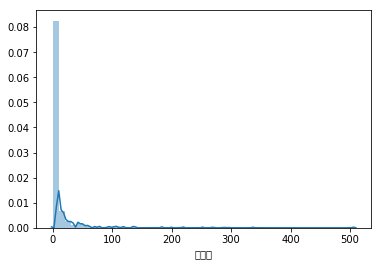

In [20]:
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')

sns.distplot(df['사건수'])